## Import libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px


## Explore the dataset

In [2]:
file_path = "mushroom_cleaned.csv"
df = pd.read_csv(file_path)


In [3]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


## Checkout for null_values/duplicates

In [5]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [6]:
df.duplicated().sum()

303

## Drop duplicates

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

## Data Visualization

In [9]:
df1 = df.copy()
df.head(3)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1


In [10]:
df['class'] = df['class'].map({0: 'Parasitic-mushroom', 1: 'Endophytic-mushroom'})

In [11]:
df.head(3)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,Endophytic-mushroom
1,1461,2,2,10,3.807467,1557,11,1.804273,Endophytic-mushroom
2,1371,2,2,10,3.612496,1566,11,1.804273,Endophytic-mushroom


In [12]:
df2 = df.groupby('class')['cap-diameter'].mean().reset_index()
df2

,class,cap-diameter
0,Endophytic-mushroom,515.188853
1,Parasitic-mushroom,633.064696


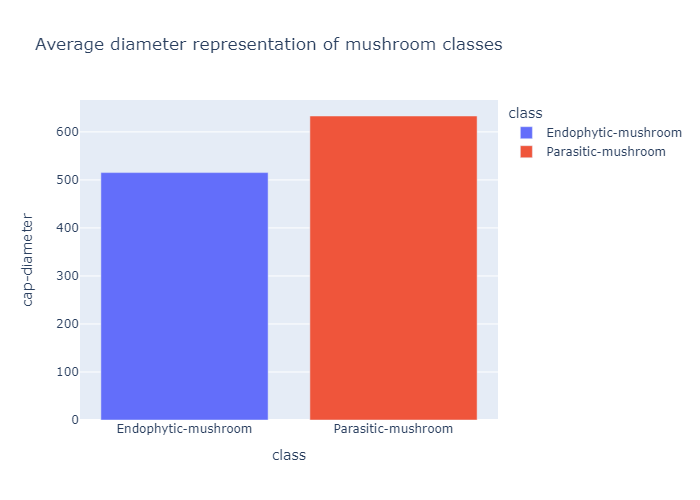

In [13]:
fig = px.bar(df2, x='class', y='cap-diameter', color='class', title='Average diameter representation of mushroom classes')
fig.show(renderer='png')

In [14]:
df2 = df.groupby('class')['stem-height'].median().reset_index()
df2

,class,stem-height
0,Endophytic-mushroom,0.712665
1,Parasitic-mushroom,0.473925


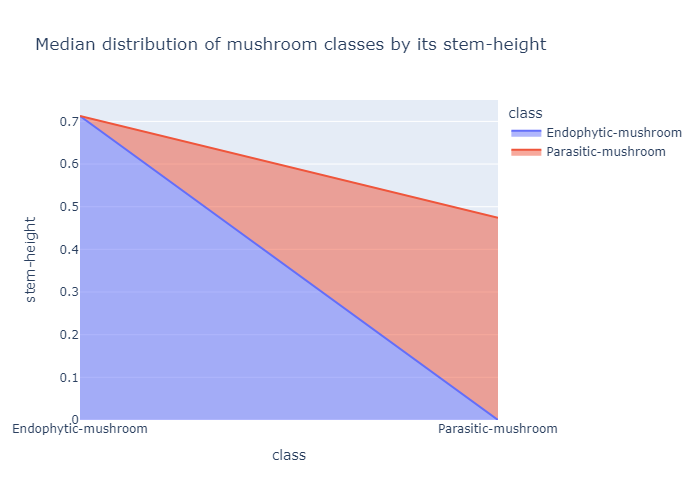

In [15]:
fig = px.area(df2, x='class', y='stem-height', color='class', title='Median distribution of mushroom classes by its stem-height')
fig.show(renderer='png')

In [16]:
# Using python map method to classify stem_colours
df['stem-color'] = df['stem-color'].map({
    0:'black', 1:'dark-brown', 2:'dark-gray', 3:'yellow', 4:'pinkish', 5:'white', 
    6:'blackish-brown', 7:'reddish', 8:'brown', 9:'orange', 10:'yellow-brown', 11:'pale-yellow',
    12:'fox-red'
})

In [17]:
df.tail(3)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54032,82,5,3,2,0.915593,584,fox-red,0.88845,Endophytic-mushroom
54033,79,2,3,2,1.034963,491,fox-red,0.88845,Endophytic-mushroom
54034,72,5,3,2,1.158311,492,fox-red,0.88845,Endophytic-mushroom


In [18]:
df2 = df.groupby('class')['stem-color'].value_counts().reset_index()
df2.head()

,class,stem-color,count
0,Endophytic-mushroom,blackish-brown,9539
1,Endophytic-mushroom,pale-yellow,8274
2,Endophytic-mushroom,fox-red,4522
3,Endophytic-mushroom,dark-brown,1379
4,Endophytic-mushroom,yellow,1032


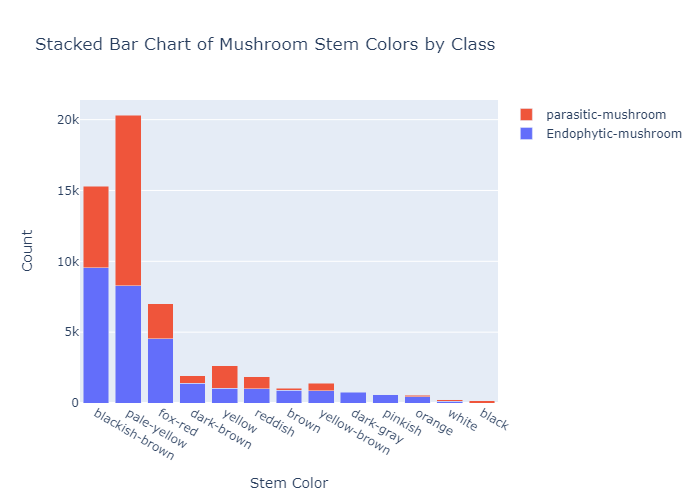

In [19]:
import plotly.graph_objects as go

# Create traces for each class
trace_endophytic = go.Bar(x=df2[df2['class']=='Endophytic-mushroom']['stem-color'],
                          y=df2[df2['class']=='Endophytic-mushroom']['count'],
                          name='Endophytic-mushroom')

trace_parasitic = go.Bar(x=df2[df2['class']=='Parasitic-mushroom']['stem-color'],
                         y=df2[df2['class']=='Parasitic-mushroom']['count'],
                         name='parasitic-mushroom')


# Combine traces into a fig
fig = go.Figure(data=[trace_endophytic, trace_parasitic])


# Set the layout for the stacked bar chart
fig.update_layout(
    barmode='stack',
    title='Stacked Bar Chart of Mushroom Stem Colors by Class',
    xaxis_title='Stem Color',
    yaxis_title='Count'
)

fig.show(renderer='png')






In [20]:
df2 = df['class'].value_counts().reset_index()
df2

,class,count
0,Endophytic-mushroom,29372
1,Parasitic-mushroom,24360


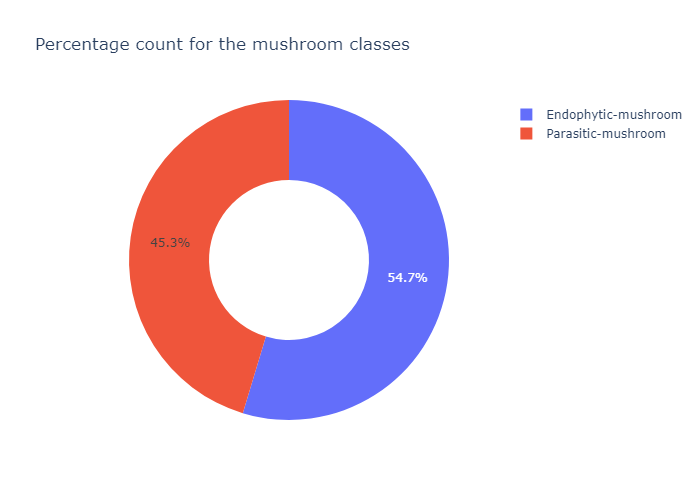

In [21]:
fig = px.pie(df2, names='class', values='count', hole=0.5, title='Percentage count for the mushroom classes')
fig.show(renderer='png')

In [22]:
df2 = df.groupby('stem-color')['stem-width'].mean().reset_index()
df2.head(3)

,stem-color,stem-width
0,black,1947.768786
1,blackish-brown,1013.785504
2,brown,1162.200976


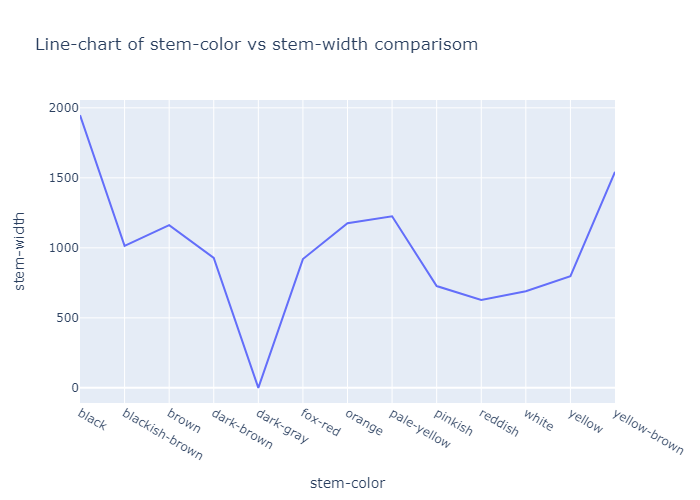

In [23]:
fig = px.line(df2, x='stem-color', y='stem-width', title='Line-chart of stem-color vs stem-width comparisom')
fig.show(renderer='png')

In [24]:
df.head(3)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,pale-yellow,1.804273,Endophytic-mushroom
1,1461,2,2,10,3.807467,1557,pale-yellow,1.804273,Endophytic-mushroom
2,1371,2,2,10,3.612496,1566,pale-yellow,1.804273,Endophytic-mushroom


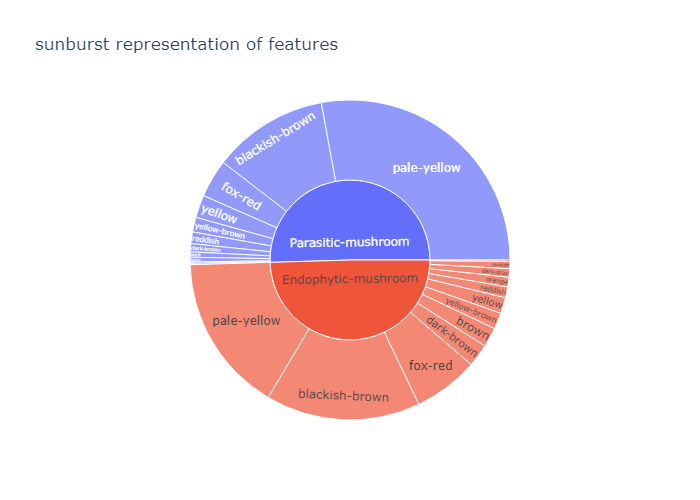

In [25]:
fig = px.sunburst(df, path=['class', 'stem-color'], values='cap-diameter', color='class', title='sunburst representation of features')
fig.show(renderer='png')

In [26]:
nums = df.select_dtypes('number')
df_corr = nums.corr()

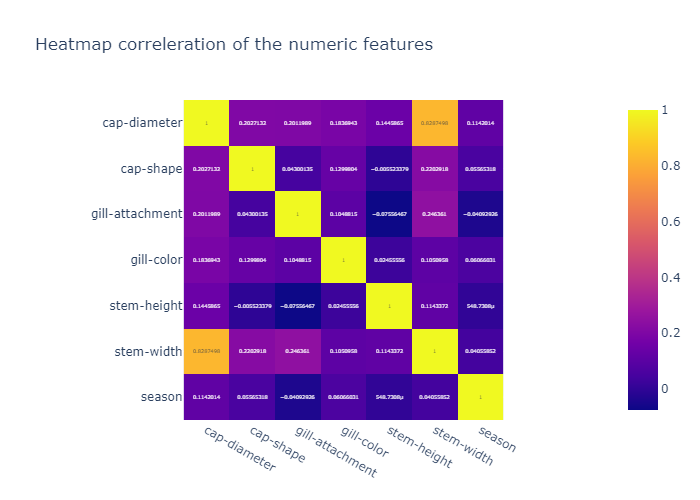

In [27]:
fig = px.imshow(df_corr, text_auto=True, title='Heatmap correleration of the numeric features')
fig.show(renderer='png')

#### NB: I made use of the parameter(renderer='png'), to enable my charts display on github coz github does not surport interactive chart like plotly...to make the chart interactive you can delete the parameter "renderer"

## Drop unneccesary features

In [28]:
df = df.drop(['season', 'gill-attachment', 'gill-color'], axis=1)
df.head(3)

,cap-diameter,cap-shape,stem-height,stem-width,stem-color,class
0,1372,2,3.807467,1545,pale-yellow,Endophytic-mushroom
1,1461,2,3.807467,1557,pale-yellow,Endophytic-mushroom
2,1371,2,3.612496,1566,pale-yellow,Endophytic-mushroom


## Convert categorical features to numeric

In [82]:
from sklearn.preprocessing import LabelEncoder
# Instantiate 
encoder = LabelEncoder()

## Select the categorical features

In [83]:
cat = df.select_dtypes('object')

In [84]:
for i in df.columns:
    if i in cat.columns:
        df[i] = encoder.fit_transform(df[i])

In [29]:
df.head(3)

,cap-diameter,cap-shape,stem-height,stem-width,stem-color,class
0,1372,2,3.807467,1545,pale-yellow,Endophytic-mushroom
1,1461,2,3.807467,1557,pale-yellow,Endophytic-mushroom
2,1371,2,3.612496,1566,pale-yellow,Endophytic-mushroom


## Convert feature from float to integer

In [86]:
df['stem-height'] = df['stem-height'].astype('int')

In [87]:
df.shape

(53732, 6)

## Checkout for outliers

In [88]:
df.describe()

,cap-diameter,cap-shape,stem-height,stem-width,stem-color,class
count,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000
mean,568.629178,4.005900,0.343073,1057.000633,5.132863,0.453361
std,360.384461,2.165188,0.622899,780.263033,3.202520,0.497825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,290.000000,2.000000,0.000000,430.000000,1.000000,0.000000
50%,528.000000,5.000000,0.000000,929.000000,7.000000,0.000000
75%,782.000000,6.000000,1.000000,1527.000000,7.000000,1.000000
max,1891.000000,6.000000,3.000000,3569.000000,12.000000,1.000000


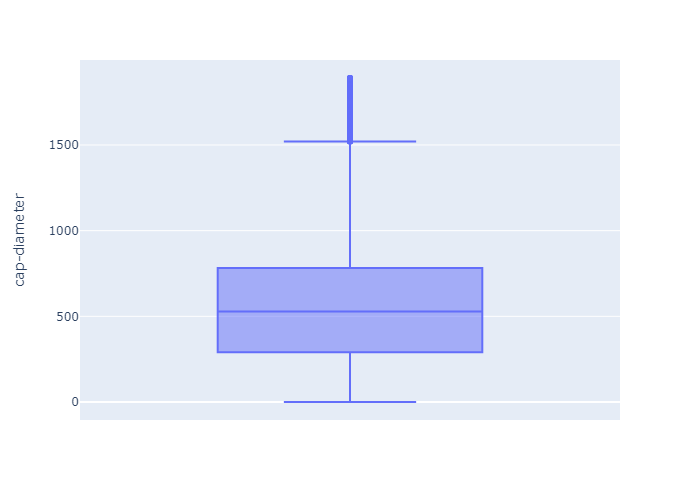

In [30]:
fig = px.box(df, y='cap-diameter')
fig.show(renderer='png')

## Remove Outliers on cap-diameter/stem-width/stem-height

In [90]:
# Using InterQuartile Range Method
columns_to_filter = ['cap-diameter', 'stem-height', 'stem-width']

for column in columns_to_filter:
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5 * IQR
    upperbound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lowerbound) & (df[column] <= upperbound)]

df.shape


(51715, 6)

## Divide the dataset into input(X)/target feature(y)

In [92]:
X = df.iloc[:, 0:5]
y = df.iloc[:, 5]

## Feature scaling

In [93]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scalar = RobustScaler()

In [94]:
X = scalar.fit_transform(X)
X

array([[ 0.28      ,  0.25      ,  0.        ,  0.40304907,  0.16666667],
       [ 0.64210526, -0.25      ,  1.        ,  0.7555979 ,  0.16666667],
       [ 0.08631579, -0.25      ,  0.        ,  0.31634111,  0.16666667],
       ...,
       [-0.89894737,  0.        ,  0.        , -0.28966174, -0.16666667],
       [-0.90526316, -0.75      ,  1.        , -0.37827537, -0.16666667],
       [-0.92      ,  0.        ,  1.        , -0.37732253, -0.16666667]])

## Split the features into training/testing set

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the features using SVM Algorithm

In [97]:
from sklearn.svm import SVR
# make an instance of svm
model = SVR()

## Fit the model for training

In [98]:
# model.fit(X_train, y_train)

SVR()

## Predict the test set

In [99]:
predict = model.predict(X_test)
predict

array([ 0.89172183, -0.09511297, -0.02050404, ...,  0.10865373,
        0.43720358,  0.68185272])

## Convert continuous predictions to binary

In [100]:
predict = (predict >= 0.5).astype(int)


## Evaluate the model

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
accuracy = accuracy_score(y_test, predict)
accuracy

0.7866189693512521

## Save/load the trained model

In [103]:
import joblib as joblib
from joblib import dump, load

In [104]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [105]:
model = joblib.load('model.joblib')

In [106]:
pred = model.predict([[171,	2,	1.612496,	5266,	10,	]])
threshold = 0
for i in pred:
    if pred <= threshold:
        print('parasitic-mushroom')
    else:
        print('Endophytic-mushroom')    

Endophytic-mushroom
